**Street Network Centrality Analysis**

> **Area:** Bexar County, Texas, USA

> **Area:** San Antonio Downtown, Texas, USA 

> **Area:** 1 UTSA Circle, Main Campus


**Shortest Route Plot**
>**Area:** San Antonio Downtown, Texas, USA

In [29]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

/usr/local/lib/python3.9/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.3.0'

# **Area: Bexar County, Texas, USA**

In [ ]:
# download and project a street network
#G = ox.graph_from_place('San Antonio Downtown, Texas, USA', network_type='drive')
#G = ox.graph_from_address('San Antonio Downtown, Texas, USA', dist=2000, simplify=True, network_type='drive')
G = ox.graph.graph_from_bbox(29.8740, 29.1120, -98.1079, -98.8323, network_type='drive', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, figsize=(60,60), bgcolor='k', node_size=30, node_color='r', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

In [ ]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, figsize=(60,60), bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Calculate and visualize edge centrality

# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

NameError: ignored

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, figsize=(60,60), bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [ ]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(G, node_centrality, 'node_centrality')
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(G)

# **Area: San Antonio Downtown, Texas, USA**


>*   Download
*   Print all the nodes
*   Project a street network





[149457173, 149489942, 149457188, 149521058, 2520505622, 149458725, 149498791, 149462624, 1672908190]
[149462636, 149500038, 149462672, 149462680, 150029637, 149479915, 149462690, 1156897180, 149787731]
[149466824, 149508783, 149466848, 311986868, 149469427, 150034252, 1449094072, 149744453, 149472783]
[149472801, 149458663, 149586184, 149586170, 149475678, 150034392, 149739297, 149475684, 149800489]
[149477274, 6695083475, 149796254, 149477315, 150031330, 149478402, 149514792, 149479905, 1156896841]
[1156897222, 1156897118, 3211573810, 149481497, 149481498, 149892024, 149538854, 149485097, 150031317]
[150031302, 149524152, 150029620, 149498797, 149509149, 3647113729, 1175108912, 149498801, 149500029]
[149498803, 149616615, 1175108984, 3647113749, 149505170, 9526221627, 149505171, 1459413666, 149860537]
[150026602, 149860544, 149507180, 2859910663, 149841508, 1872161047, 149507181, 149507191, 149507585]
[150029651, 627540097, 149508873, 1459391988, 150015189, 149509128, 149522925, 3119

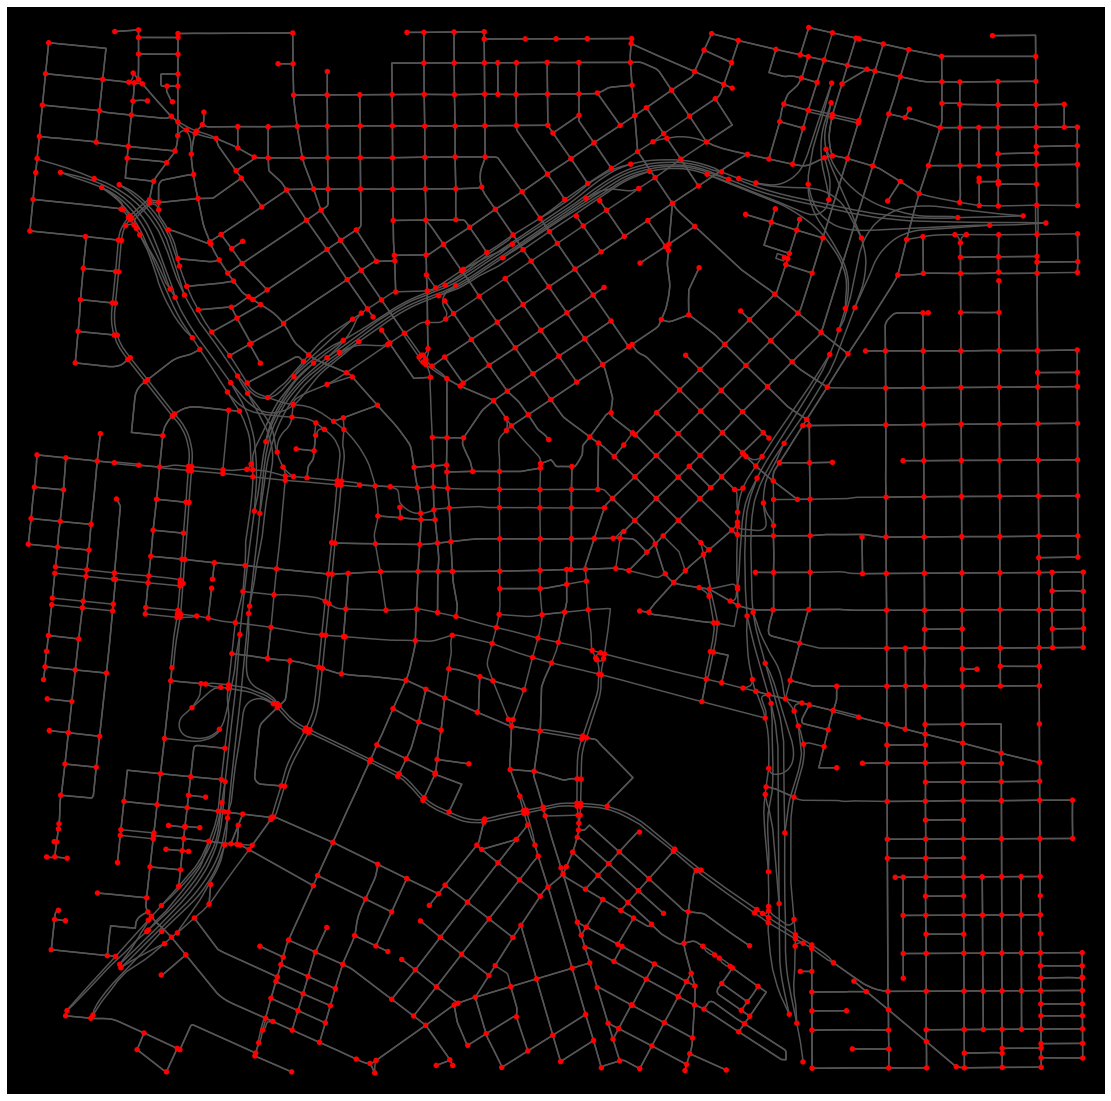

In [ ]:
#G = ox.graph_from_place('Piedmont, California', network_type='drive')
G = ox.graph_from_address('San Antonio Downtown, Texas, USA', dist=2000, simplify=True, network_type='drive')
G = ox.project_graph(G)

# create a list of all the node IDs in the network
node_list = list(G.nodes())

# print the list of node IDs with 9 values per row
for i in range(0, len(node_list), 9):
    print(node_list[i:i+9])
  
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='k', node_size=30, node_color='r', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)



>*   Find number of nodes and edges
*   Find particular node properties
*   Highlight that particular node and plot it.





Number of nodes: 1350
Number of edges: 3686
Node 6474455874 properties: {'y': 3253634.4600904845, 'x': 548477.9170747062, 'street_count': 3, 'lon': -98.5002931, 'lat': 29.4110754}


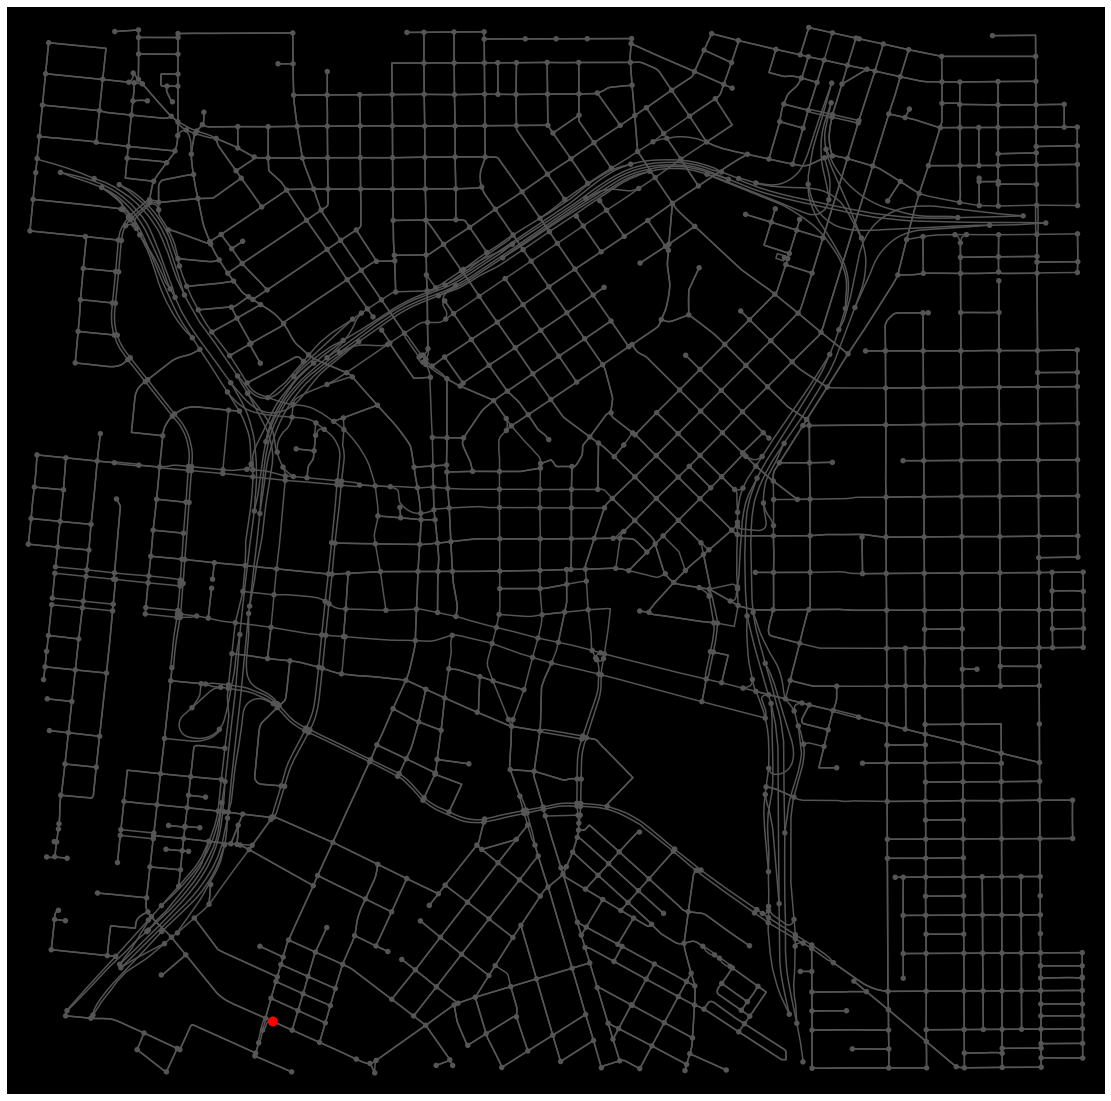

In [28]:
import matplotlib.pyplot as plt

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

node_id = 6474455874
node_props = G.nodes[node_id]

# print the node properties
print("Node %d properties: %s" % (node_id, node_props))

origin_node = 123456789
destination_node = 987654321

route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')


# extract the node's coordinates
node_x = node_props['y']
node_y = node_props['x']

# create a list of node sizes
node_sizes = [30] * len(G.nodes)
node_sizes[list(G.nodes).index(node_id)] = 100

# create a list of node colors
node_colors = ['#555555'] * len(G.nodes)
node_colors[list(G.nodes).index(node_id)] = 'red'

# plot the network
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='k', node_size=node_sizes, node_color=node_colors, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# plot the node
#ax.scatter(node_x, node_y, s=200, c='yellow', edgecolors='black', linewidths=2, zorder=3)

# show the plot
plt.show()

> * Node closeness centrality






In [ ]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

In [ ]:
pip show osmnx

Name: osmnx
Version: 1.2.2
Summary: Retrieve, model, analyze, and visualize OpenStreetMap street networks and other spatial data
Home-page: https://github.com/gboeing/osmnx
Author: Geoff Boeing
Author-email: boeing@usc.edu
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: geopandas, matplotlib, networkx, numpy, pandas, pyproj, requests, Rtree, Shapely
Required-by: 


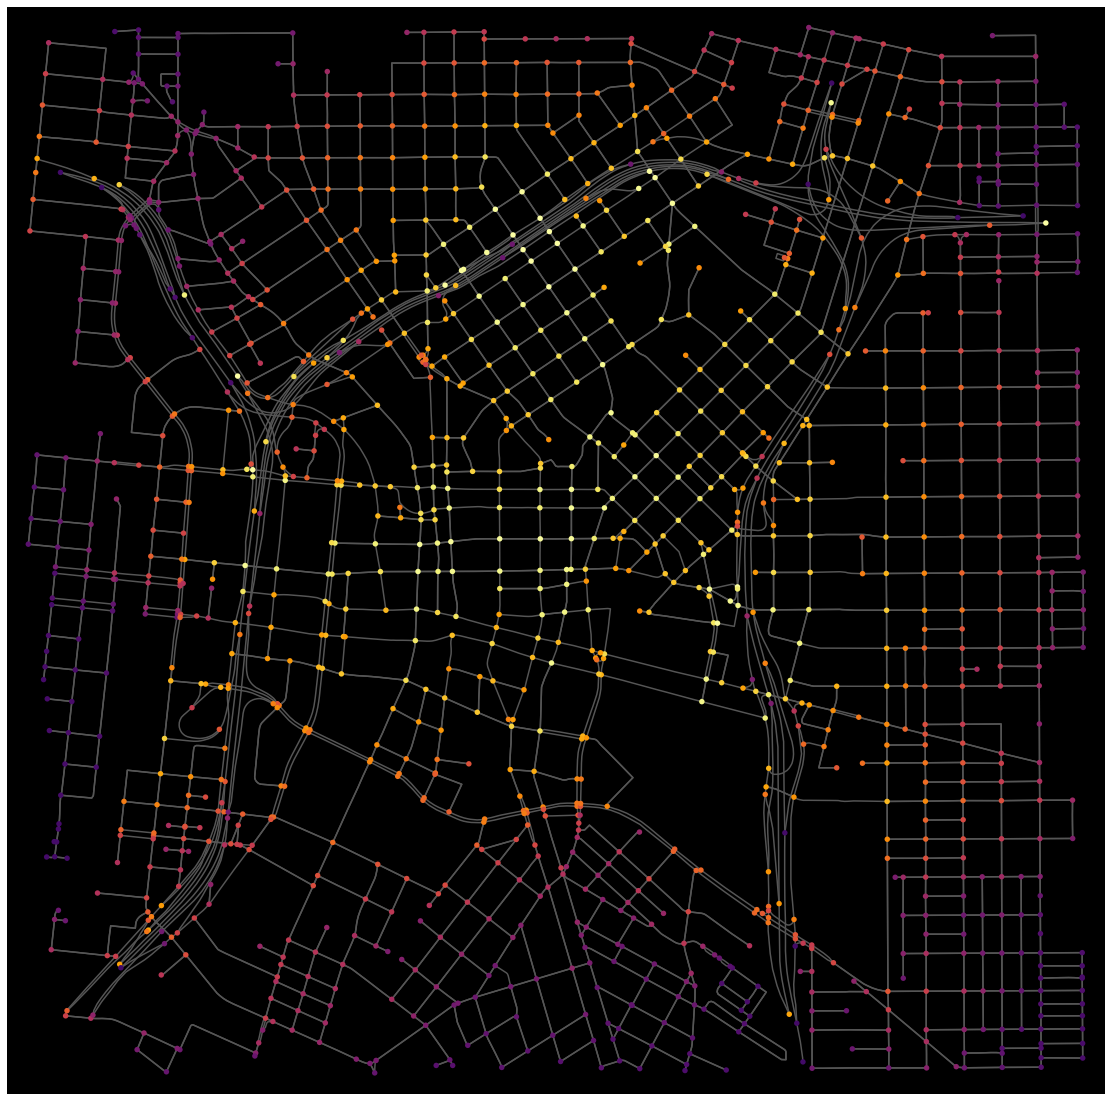

In [ ]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

>Calculate and visualize edge centrality

In [ ]:
#Calculate and visualize edge centrality

# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

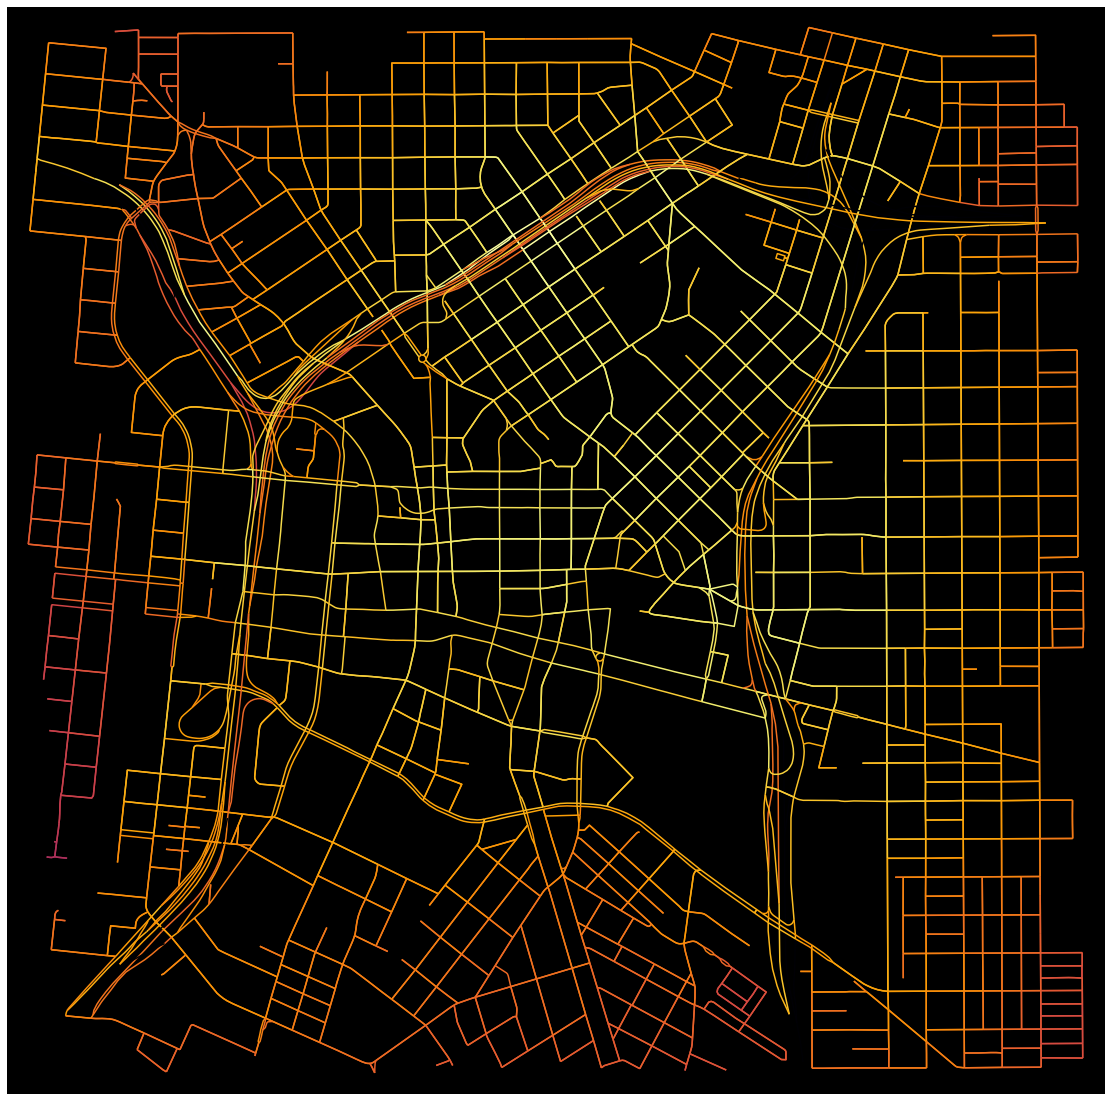

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [ ]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(G, node_centrality, 'node_centrality')
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(G)

/usr/local/lib/python3.8/dist-packages/osmnx/io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.8/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


# **Area: 1 UTSA Circle, Main Campus**

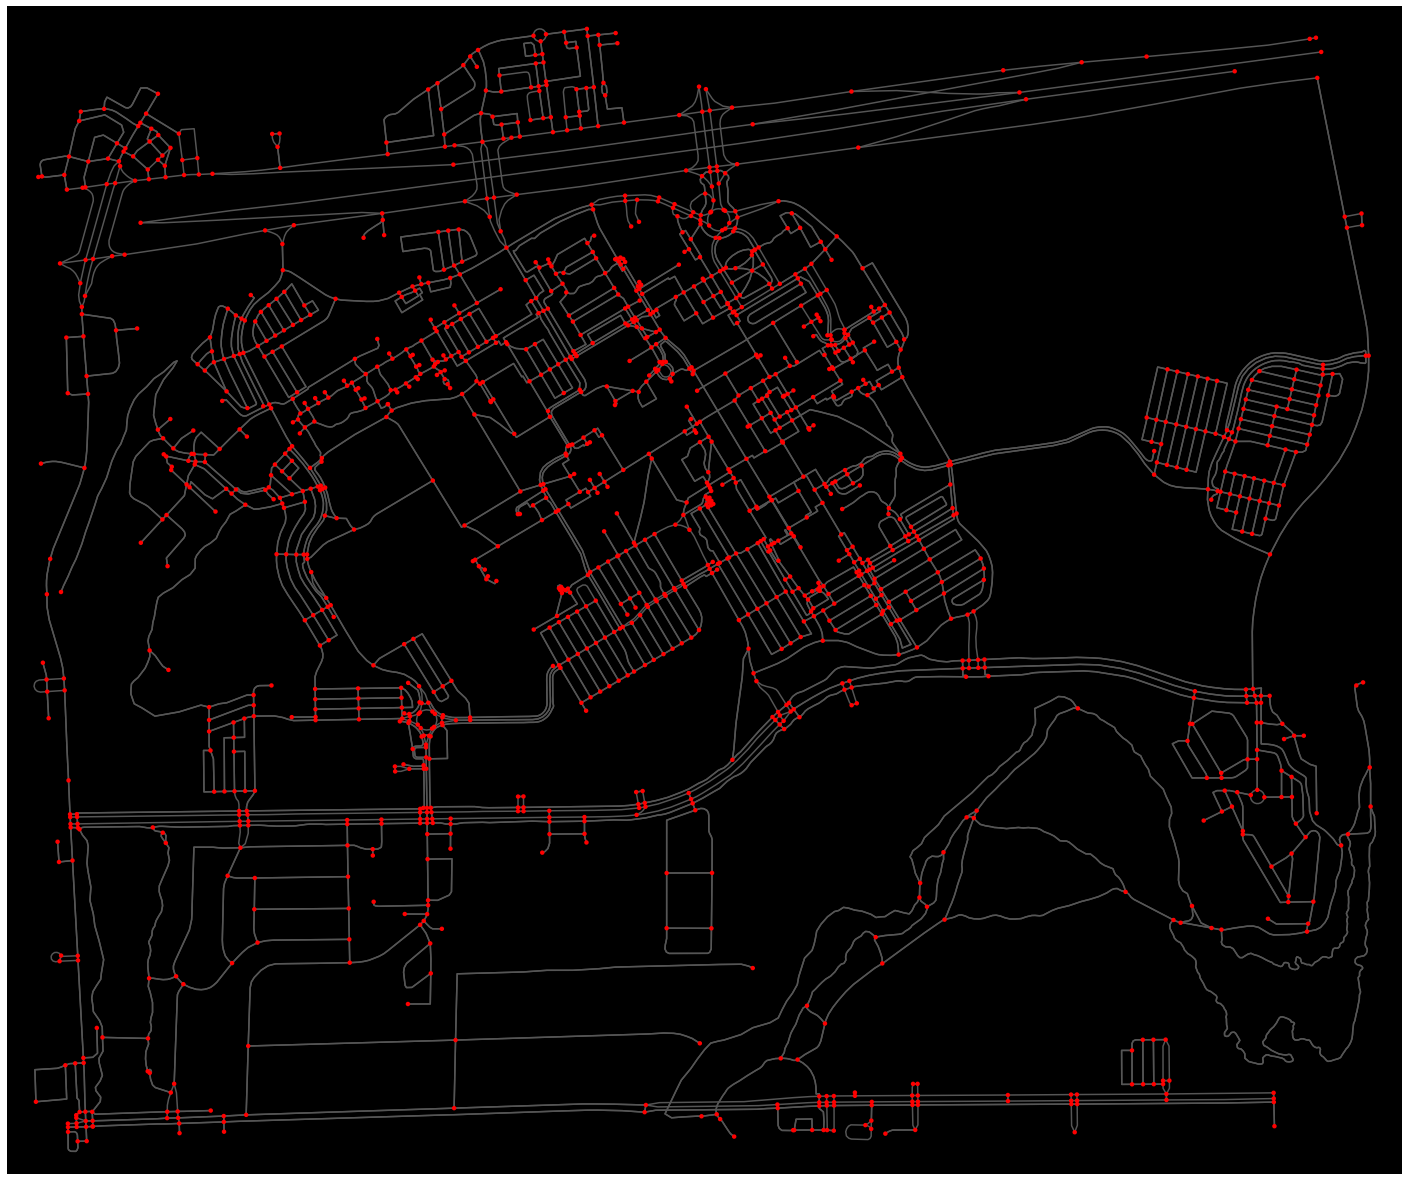

In [ ]:
# download and project a street network
#G = ox.graph_from_place('Piedmont, California', network_type='drive')
G = ox.graph.graph_from_bbox(29.5904, 29.5717, -98.6068, -98.6325, network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, figsize=(25,25), bgcolor='k', node_size=20, node_color='r', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)


In [ ]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

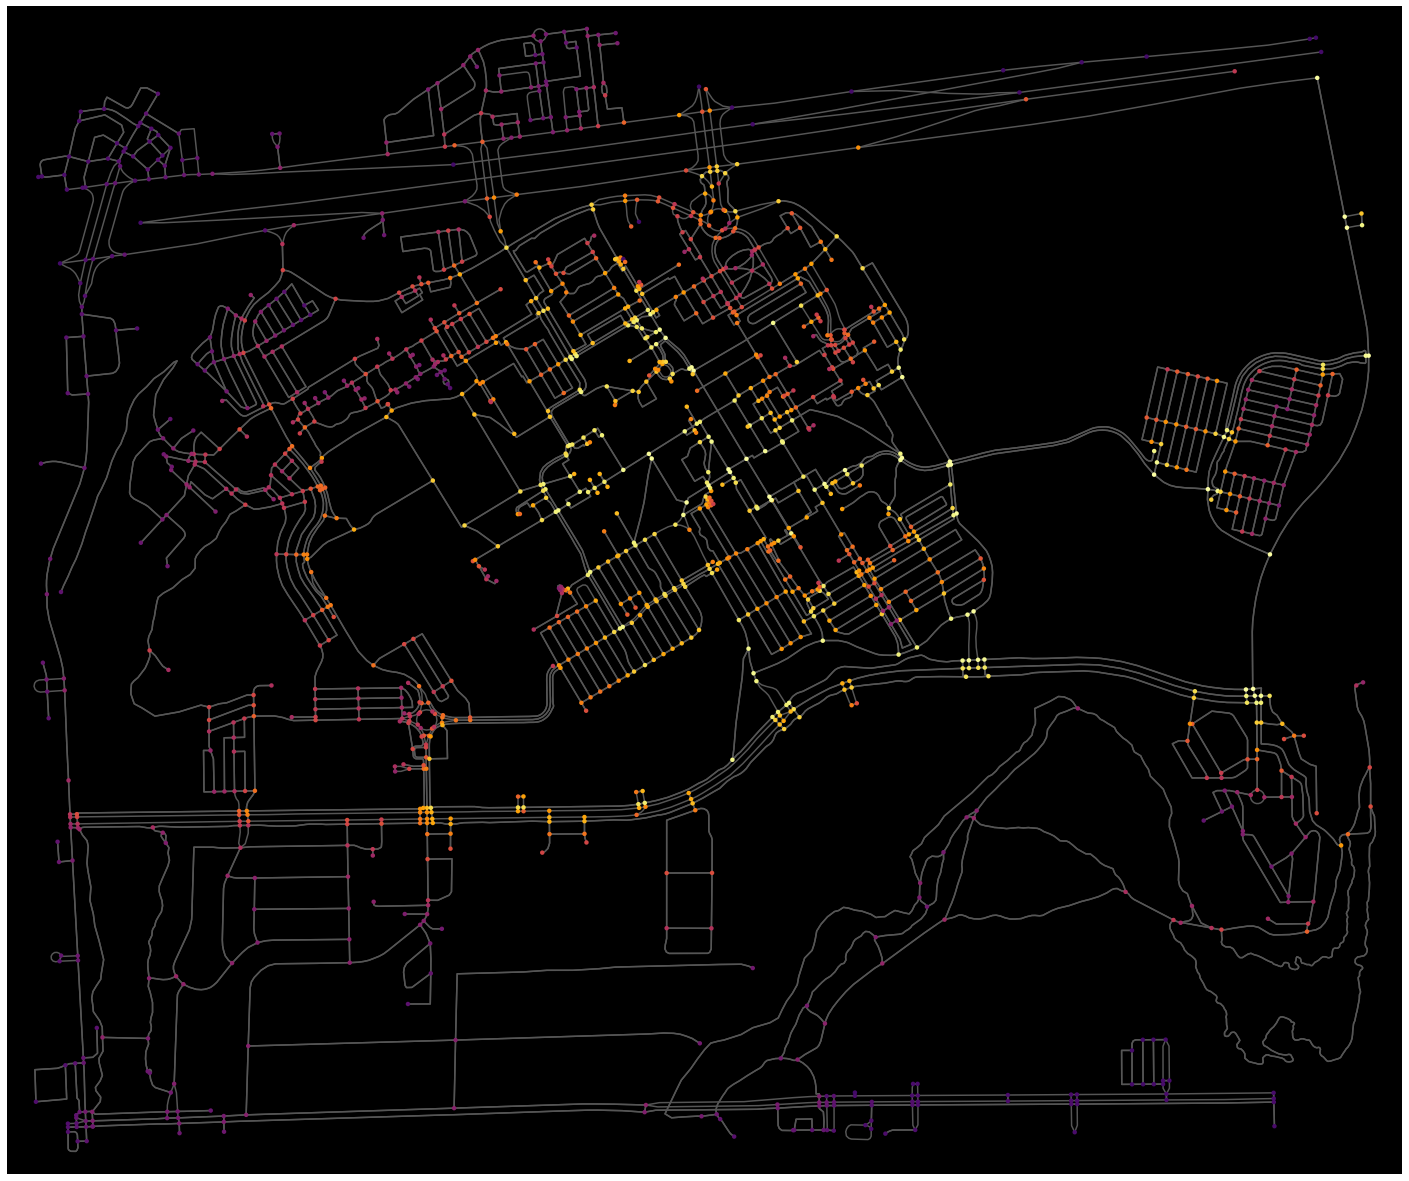

In [ ]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, figsize=(25,25), bgcolor='k', node_size=20, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [ ]:
#Calculate and visualize edge centrality

# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

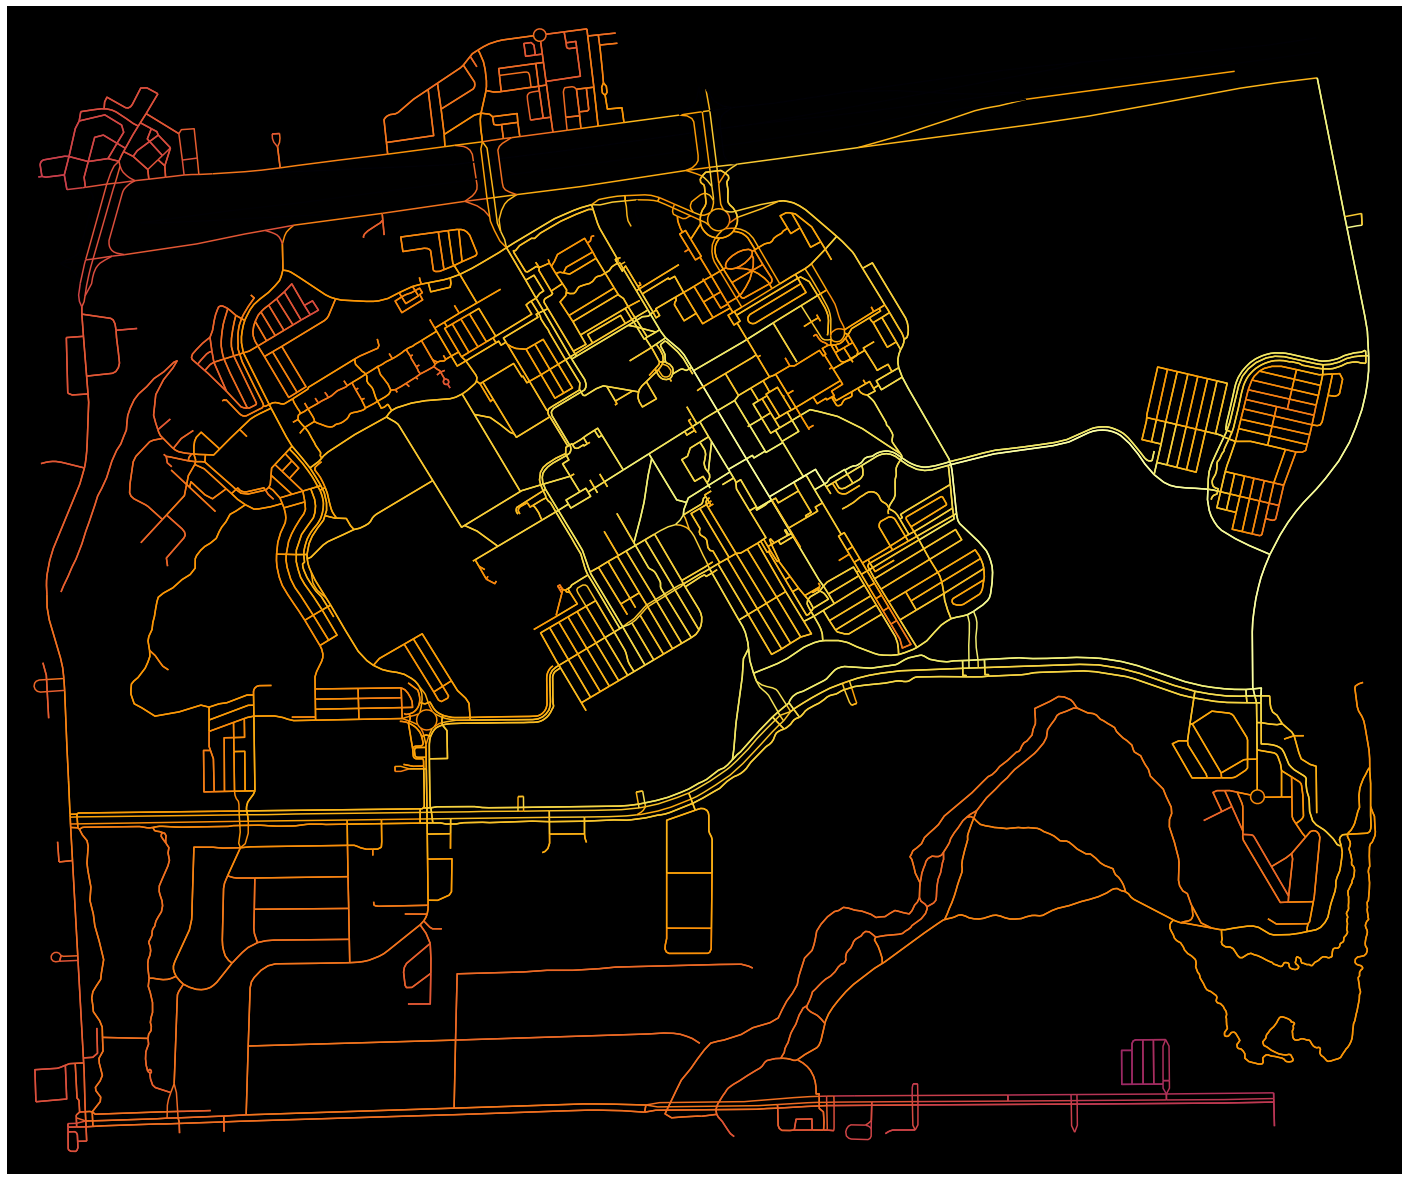

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, figsize=(25,25), bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [ ]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(G, node_centrality, 'node_centrality')
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(G)

/usr/local/lib/python3.8/dist-packages/osmnx/io.py:107: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.8/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


#**Shortest route plot**

In [31]:
import matplotlib.pyplot as plt

G = ox.graph_from_address('San Antonio Downtown, Texas, USA', dist=2000, simplify=True, network_type='drive')
G = ox.project_graph(G)

# create a list of all the node IDs in the network
node_list = list(G.nodes())

# print the list of node IDs with 9 values per row
for i in range(0, len(node_list), 9):
    print(node_list[i:i+9])

[149457173, 149489942, 149457188, 149521058, 2520505622, 149458725, 149498791, 149462624, 1672908190]
[149462636, 149500038, 149462672, 149462680, 150029637, 149479915, 149462690, 1156897180, 149787731]
[149466824, 149508783, 149466848, 311986868, 149469427, 150034252, 1449094072, 149744453, 149472783]
[149472801, 149458663, 149586184, 149586170, 149475678, 150034392, 149739297, 149475684, 149800489]
[149477274, 6695083475, 149796254, 149477315, 150031330, 149478402, 149514792, 149479905, 1156896841]
[1156897222, 1156897118, 3211573810, 149481497, 149481498, 149892024, 149538854, 149485097, 150031317]
[150031302, 149524152, 150029620, 149498797, 149509149, 3647113729, 1175108912, 149498801, 149500029]
[149498803, 149616615, 1175108984, 3647113749, 149505170, 9526221627, 149505171, 1459413666, 149860537]
[150026602, 149860544, 149507180, 2859910663, 149841508, 1872161047, 149507181, 149507191, 149507585]
[150029651, 627540097, 149508873, 1459391988, 150015189, 149509128, 149522925, 3119

Number of nodes: 1350
Number of edges: 3686
Node 6474455874 properties: {'y': 3253634.4600904845, 'x': 548477.9170747062, 'street_count': 3, 'lon': -98.5002931, 'lat': 29.4110754}


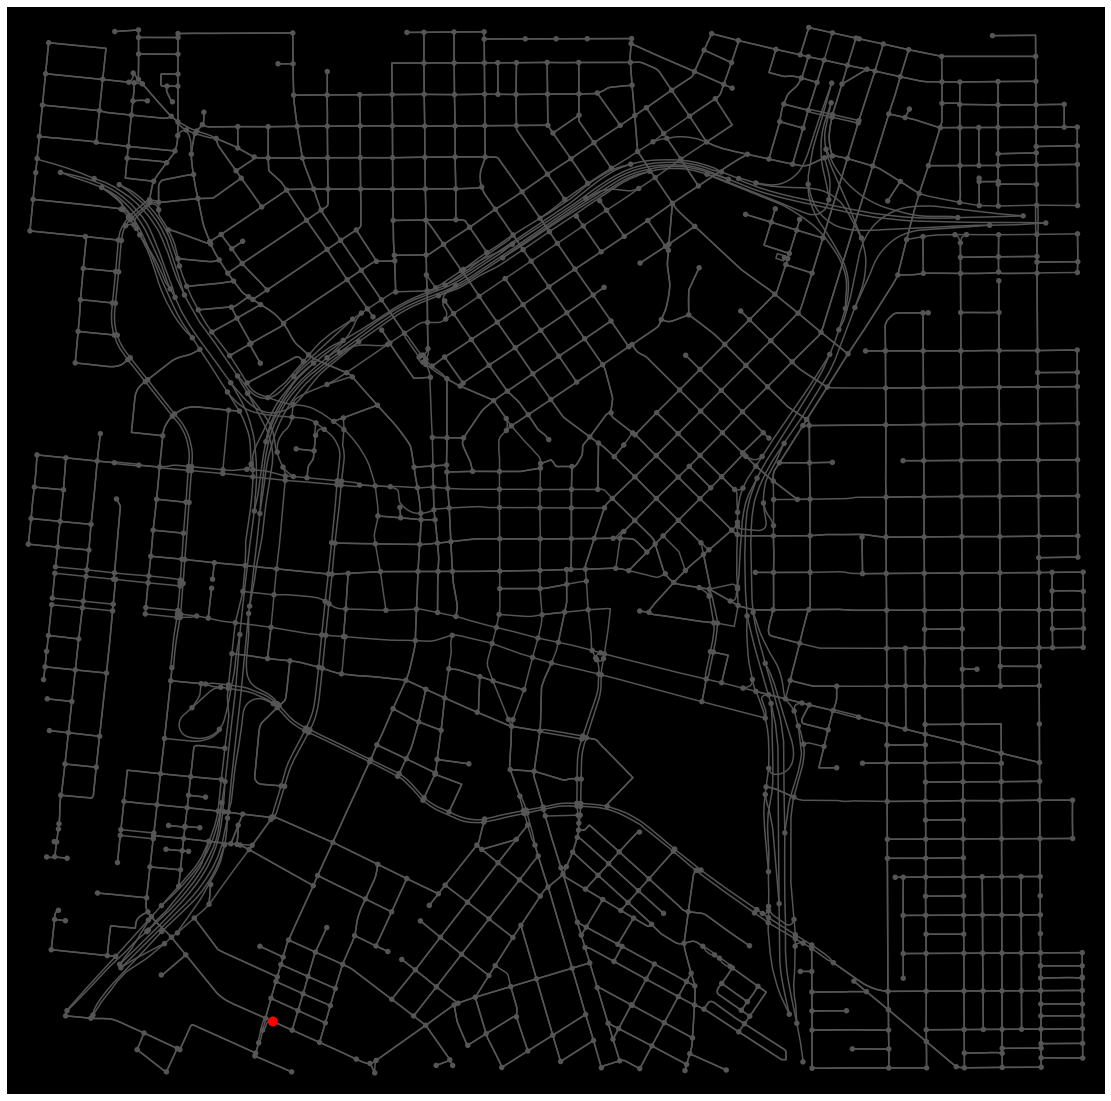

In [32]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

node_id = 6474455874
node_props = G.nodes[node_id]

# print the node properties
print("Node %d properties: %s" % (node_id, node_props))

# extract the node's coordinates
node_x = node_props['y']
node_y = node_props['x']

# create a list of node sizes
node_sizes = [30] * len(G.nodes)
node_sizes[list(G.nodes).index(node_id)] = 100

# create a list of node colors
node_colors = ['#555555'] * len(G.nodes)
node_colors[list(G.nodes).index(node_id)] = 'red'

# plot the network
fig, ax = ox.plot_graph(G, figsize=(20,20), bgcolor='k', node_size=node_sizes, node_color=node_colors, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# plot the node
#ax.scatter(node_x, node_y, s=200, c='yellow', edgecolors='black', linewidths=2, zorder=3)

# show the plot
plt.show()

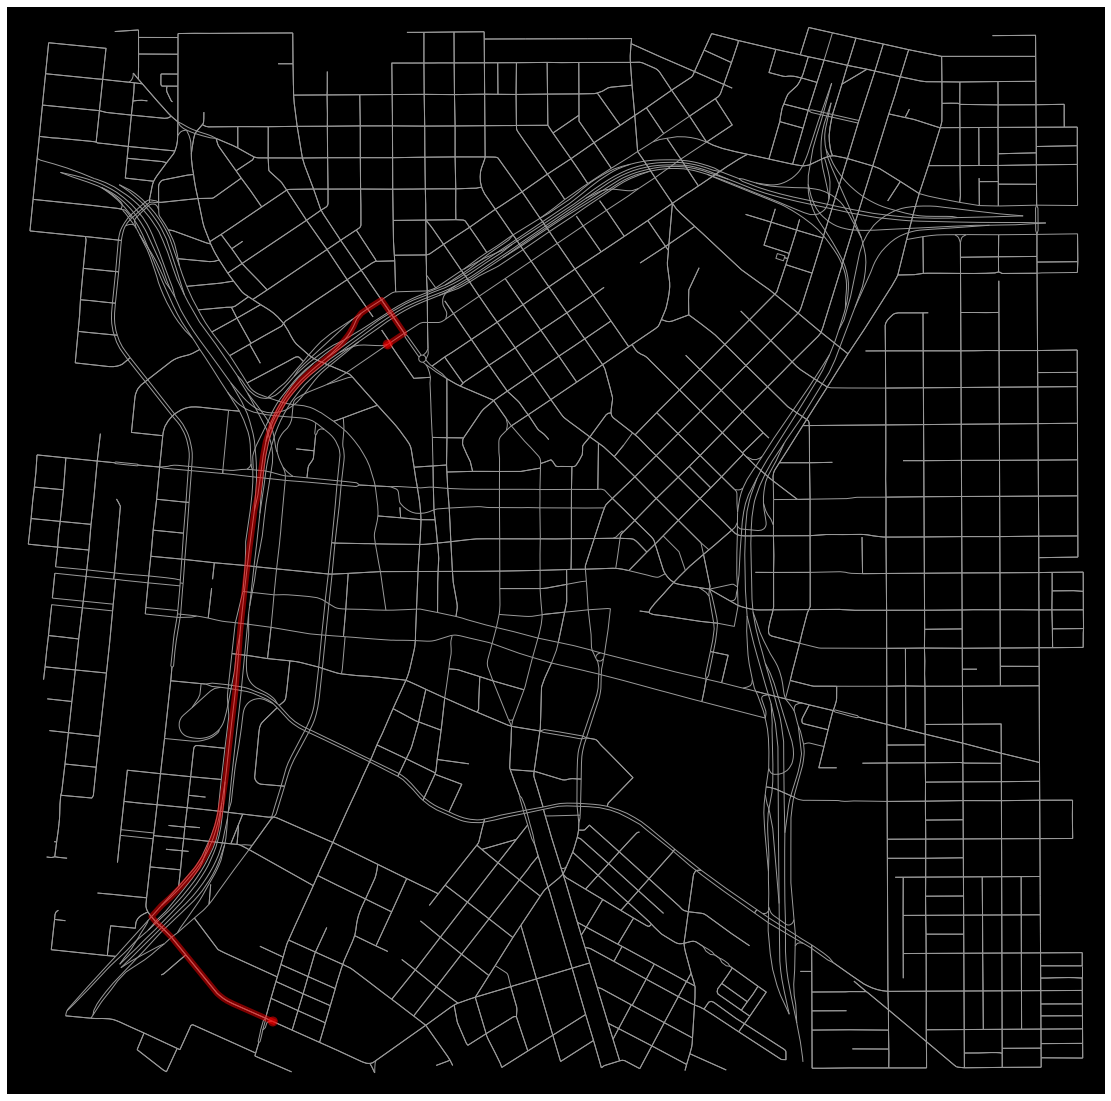

In [39]:
origin_node = 1438069062
destination_node = 6474455874

route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, figsize=(20,20), route_linewidth=6, node_size=0, bgcolor='k')